In [10]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [11]:
## Wrote this function to extract numeric value from String. But it wasnt of much use
def stringToNumber(listOfString):
 intList=[] 
 for x in listOfString:
  print(x)      
  intList.append(int(re.findall('\d+', x )[0]))
 return intList

## Data Clean Up

In [12]:
loan=pd.read_csv("loan.csv")
thresh = len(loan) * .9
loan.dropna(thresh = thresh, axis = 1, inplace = True)
loan.loc[pd.isnull(loan['emp_length']), ['emp_length']] = loan['emp_length'].mode().iloc[0] # Imputing with Mode
loan['int_rate']=loan['int_rate'].apply(lambda x: float(x[0:-1])) #Remove % sign
loan = loan.sort_index(axis=1)
round(100*(loan.isnull().sum()/len(loan.index)), 2)



acc_now_delinq                0.00
addr_state                    0.00
annual_inc                    0.00
application_type              0.00
chargeoff_within_12_mths      0.14
collection_recovery_fee       0.00
collections_12_mths_ex_med    0.14
delinq_2yrs                   0.00
delinq_amnt                   0.00
dti                           0.00
earliest_cr_line              0.00
emp_length                    0.00
emp_title                     6.19
funded_amnt                   0.00
funded_amnt_inv               0.00
grade                         0.00
home_ownership                0.00
id                            0.00
initial_list_status           0.00
inq_last_6mths                0.00
installment                   0.00
int_rate                      0.00
issue_d                       0.00
last_credit_pull_d            0.01
last_pymnt_amnt               0.00
last_pymnt_d                  0.18
loan_amnt                     0.00
loan_status                   0.00
member_id           

## Select Only Charged Off Loans

In [13]:
loan_chargedOff= pd.DataFrame(loan[loan.loan_status=='Charged Off']) 

## Creating Bins For Annual Income and Plot Bar For Charged Off Loans

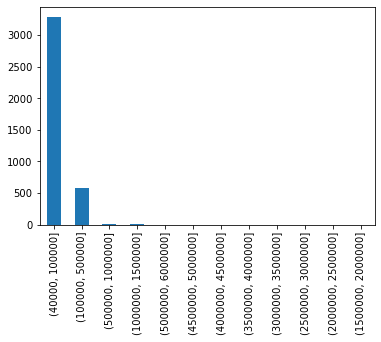

In [14]:
loan_chargedOff['annual_inc_bins'] = pd.cut(x=loan_chargedOff['annual_inc'], bins=[40000,100000,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000,6000000])
loan_chargedOff['annual_inc_bins'].value_counts().plot.bar()


## Find Top 3 Defaulting States 

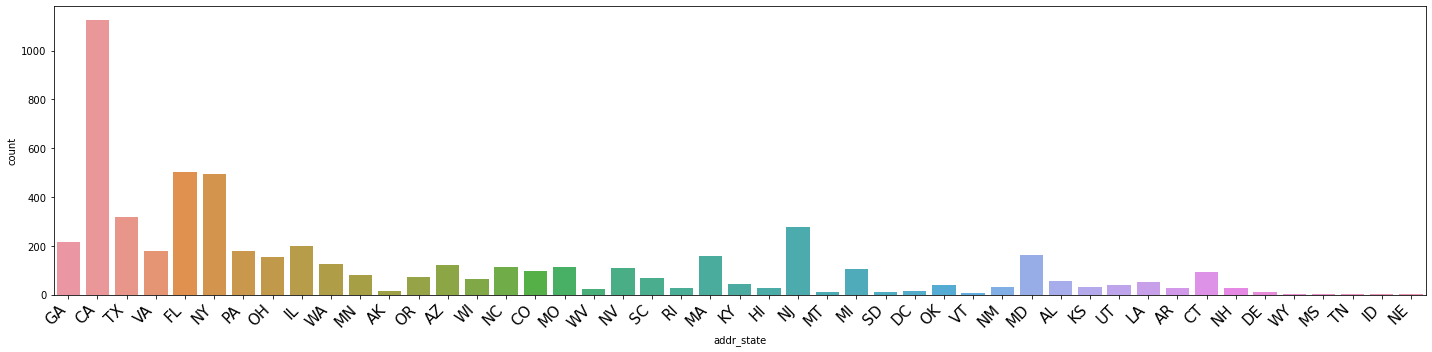

In [15]:
plt.figure(figsize=(20,5))
ax=sns.countplot(x="addr_state",data=loan_chargedOff)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=15)
plt.tight_layout()
plt.show()

## Charged Off Loans as per State and Income Range

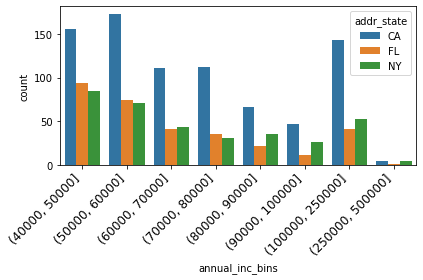

In [16]:
loan_chargedOff_top_states=pd.DataFrame(loan_chargedOff[((loan_chargedOff.addr_state=='CA') | ( loan_chargedOff.addr_state=='FL') | (loan_chargedOff.addr_state=='NY') & (loan_chargedOff.annual_inc <= 500000))])
loan_chargedOff_top_states['annual_inc_bins'] =pd.cut(x=loan_chargedOff_top_states['annual_inc'], bins=[40000,50000,60000,70000,80000,90000,100000,250000,500000])
ax=sns.countplot(x="annual_inc_bins",hue="addr_state",data=loan_chargedOff_top_states)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=12)
plt.tight_layout()
plt.show()
#x.value_counts().plot.bar()

## Plot the percentage of Charged Off Loans

In [34]:
loan.drop(loan[loan['loan_status'] == "Current"].index, inplace = True) 
ax = sns.barplot(x="loan_status", y=x, data=loan, estimator=lambda x: len(x) / len(loan) * 100)
plt.xlabel("Loan Status",size=15,color="red")
plt.ylabel("Percentage",size=15,color="red")
plt.show()


NameError: name 'x' is not defined

## Convert Loan Status ( Target Variable) to Numeric Value

In [18]:
#loan['loan_status']=loan['loan_status'].apply(lambda x:1 if x=="Charged Off" else 0)

#loan['loan_status']
loan['loan_status_numeric']=loan['loan_status'].apply(lambda x:1 if x=="Charged Off" else 0)


## Plot the Charge Off Rate for each Term

Text(0.5, 0, 'Term')

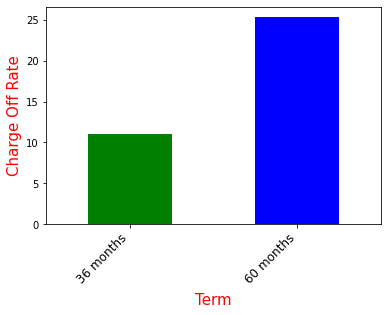

In [19]:
plt.ylabel("Charge Off Rate",fontsize=15,color='red')
plt.xlabel("Term",fontsize=15,color='red')
ax=loan.groupby(["term"])["loan_status_numeric"].apply(lambda x: round(100*(sum(x)/len(x)),2)).plot(kind='bar', color=tuple(["g", "b"]))
ax.set_xticklabels(ax.get_xticklabels(),rotation="45",ha='right',fontsize=12)
ax.set_xlabel("Term",fontsize=15,color='red')

Text(0.5, 0, 'Employment Length')

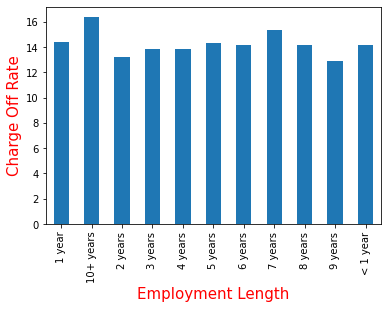

In [37]:
plt.ylabel("Charge Off Rate",fontsize=15,color='red')
plt.xlabel("Employment Length",fontsize=15,color='red')
ax1=loan.groupby(["emp_length"])["loan_status_numeric"].apply(lambda x: round(100*(sum(x)/len(x)),2)).plot.bar()
ax1.set_xlabel("Employment Length",fontsize=15,color='red')

## Plot the Charge Off Rate for each Grade

Text(0.5, 0, 'Grade')

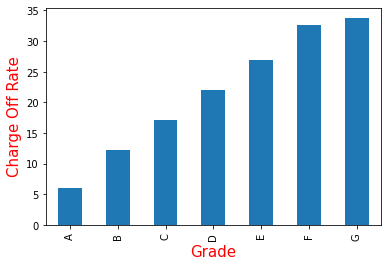

In [39]:
plt.ylabel("Charge Off Rate",fontsize=15,color='red')
plt.xlabel("Grade",fontsize=15,color='red')
ax1=loan.groupby(["grade"])["loan_status_numeric"].apply(lambda x: round(100*(sum(x)/len(x)),2)).plot.bar()
ax1.set_xlabel("Grade",fontsize=15,color='red')

## Plot the Charge Off Rate for each Sub Grade

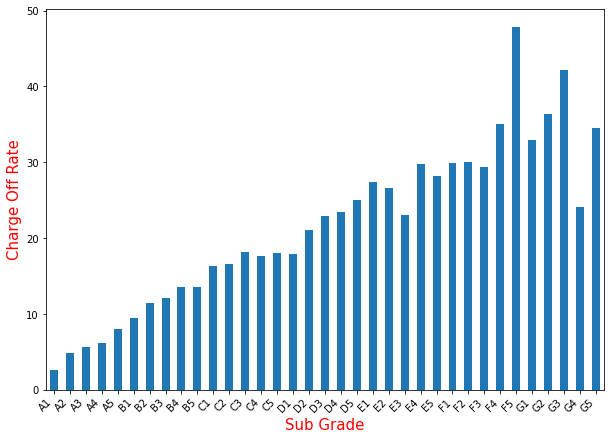

In [22]:
plt.figure(figsize=(10,7))
plt.ylabel("Charge Off Rate",fontsize=15,color='red')
plt.xlabel("Sub Grade",fontsize=15,color='red')
ax1=loan.groupby(["sub_grade"])["loan_status_numeric"].apply(lambda x: round(100*(sum(x)/len(x)),2)).plot.bar()
ax1.set_xlabel("Sub Grade",fontsize=15,color='red')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation="45",ha='right',fontsize=10)
plt.show()

## Find Top 5 Loan Purposes

In [23]:
loan.purpose.value_counts()
#top 7 purposes are ["debt_consolidation","credit_card","other","home_improvement","major_purchase","small business","car"]

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

## Find the Default Rate for Each Term and the top 5 Loan Purpose ( Bivariate Analysis)

Text(0, 0.5, 'Charge Off Rate')

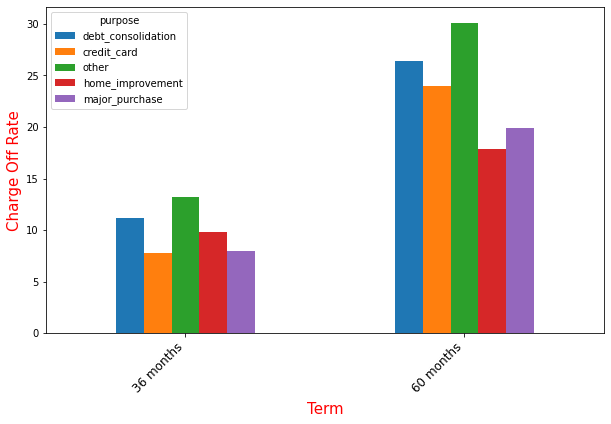

In [24]:
pivot_purpose_term=pd.pivot_table(loan, 
                     columns='purpose', 
                     values='loan_status_numeric',
                     index='term',
                     aggfunc=lambda x: round(100*(sum(x)/len(x)),2))
pivot_top_5=pivot_purpose_term[["debt_consolidation","credit_card","other","home_improvement","major_purchase"]]
ax=pivot_top_5.plot(kind="bar", figsize=[10,6])
ax.set_xticklabels(loan.term,rotation="45",ha='right',fontsize=12)
ax.set_xlabel("Term",fontsize=15,color='red')
ax.set_ylabel("Charge Off Rate",fontsize=15,color='red')

## Find the Default Rate for Each Term and Grade ( Bivariate Analysis)

Text(0, 0.5, 'Charge Off Rate')

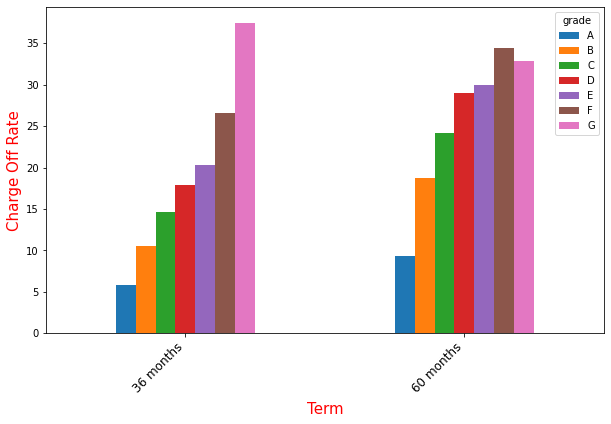

In [25]:
pivot_grade_term=pd.pivot_table(loan, 
                     columns='grade', 
                     values='loan_status_numeric',
                     index='term',
                     aggfunc=lambda x: round(100*(sum(x)/len(x)),2))
ax=pivot_grade_term.plot(kind="bar", figsize=[10,6])
ax.set_xticklabels(loan.term,rotation="45",ha='right',fontsize=12)
ax.set_xlabel("Term",fontsize=15,color='red')
ax.set_ylabel("Charge Off Rate",fontsize=15,color='red')

## Find the Default Rate for Each Grade and Loan Purpose ( Bivariate Analysis)

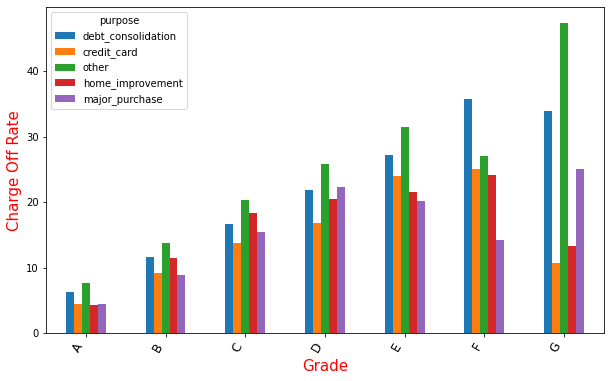

In [26]:
pivot_purpose_grade=pd.pivot_table(loan, 
                     columns='purpose', 
                     values='loan_status_numeric',
                     index='grade',
                     aggfunc=lambda x: round(100*(sum(x)/len(x)),2))
pivot_top_5=pivot_purpose_grade[["debt_consolidation","credit_card","other","home_improvement","major_purchase"]]
ax=pivot_top_5.plot(kind="bar", figsize=[10,6])
ax.set_xlabel("Grade",fontsize=15,color='red')
ax.set_ylabel("Charge Off Rate",fontsize=15,color='red')
ax.set_xticklabels(ax.get_xticklabels(),rotation="60",ha='right',fontsize=12)
plt.show()

In [27]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   acc_now_delinq              38577 non-null  int64  
 1   addr_state                  38577 non-null  object 
 2   annual_inc                  38577 non-null  float64
 3   application_type            38577 non-null  object 
 4   chargeoff_within_12_mths    38521 non-null  float64
 5   collection_recovery_fee     38577 non-null  float64
 6   collections_12_mths_ex_med  38521 non-null  float64
 7   delinq_2yrs                 38577 non-null  int64  
 8   delinq_amnt                 38577 non-null  int64  
 9   dti                         38577 non-null  float64
 10  earliest_cr_line            38577 non-null  object 
 11  emp_length                  38577 non-null  object 
 12  emp_title                   36191 non-null  object 
 13  funded_amnt                 385

In [28]:
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

## Convert Interest Rate to Categorical Variable ( Low, Medium, High)

In [29]:
loan['int_rate_categorical'] = ["Low" if x<10 else ("Medium" if x<=15 else "High") for x in loan['int_rate']]
loan.loc[:,['int_rate','int_rate_categorical']]

,int_rate,int_rate_categorical
0,10.65,Medium
1,15.27,High
2,15.96,High
3,13.49,Medium
5,7.90,Low
...,...,...
39712,8.07,Low
39713,10.28,Medium
39714,8.07,Low
39715,7.43,Low


## Plot for Interest Rate Category and Default Rate

[Text(0, 0, 'High'), Text(0, 0, 'Low'), Text(0, 0, 'Medium')]

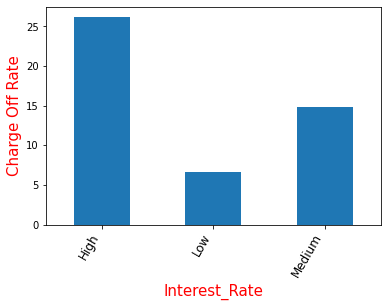

In [30]:
plt.ylabel("Charge Off Rate",fontsize=15,color='red')
plt.xlabel("Interest_Rate",fontsize=15,color='red')
ax1=loan.groupby(["int_rate_categorical"])["loan_status_numeric"].apply(lambda x: round(100*(sum(x)/len(x)),2)).plot.bar()
ax1.set_xlabel("Interest_Rate",fontsize=15,color='red')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation="60",ha='right',fontsize=12)

##  Find the Default Rate for Each Term and Interest Rate Category ( Bivariate Analysis)

[Text(0, 0, ' 36 months'), Text(0, 0, ' 60 months')]

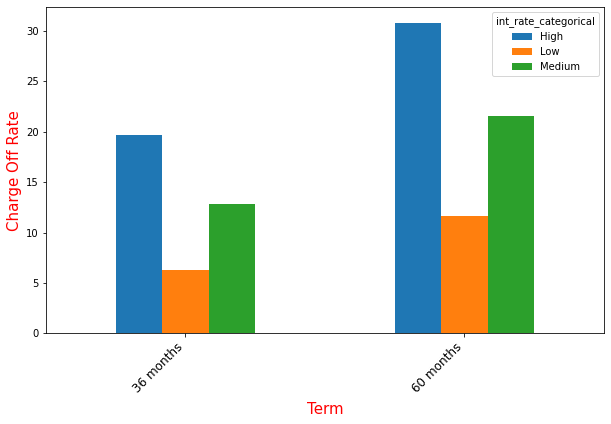

In [31]:
pivot_interestRate_grade=pd.pivot_table(loan, 
                     columns='int_rate_categorical', 
                     values='loan_status_numeric',
                     index='term',
                     aggfunc=lambda x: round(100*(sum(x)/len(x)),2))
ax=pivot_interestRate_grade.plot(kind="bar", figsize=[10,6])
ax.set_xlabel("Term",fontsize=15,color='red')
ax.set_ylabel("Charge Off Rate",fontsize=15,color='red')
ax.set_xticklabels(ax.get_xticklabels(),rotation="45",ha='right',fontsize=12)

## Extract Month from Issue Month Column

In [32]:
loan['issue_d']=pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['issue_d_month']=loan['issue_d'].dt.month_name(locale = 'English') 


## Find if Loan Issued in a particular Month has higher Default Rate

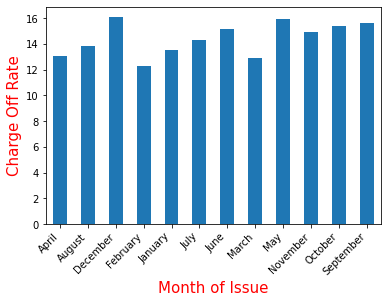

In [33]:
plt.ylabel("Charge Off Rate",fontsize=15,color='red')
ax1=loan.groupby(["issue_d_month"])["loan_status_numeric"].apply(lambda x: round(100*(sum(x)/len(x)),2)).plot.bar()
ax1.set_xlabel("Month of Issue",fontsize=15,color='red')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right",fontsize=10)
plt.show()